# Dijkstra_self visualization
In this notebook the benchmarks of my own Dijkstra implementation are visualized.

1. [SSSP time](#SSSP-time)
2. [SSST visualization](#SSST-visualization)
3. [SSSP 11528260 visualization](#SSSP-11528260-visualization)
   1. [Cost](#Cost)
   2. [Backtracking](#Backtracking)
4. [SSST 11528260_9708000 explored visualization](#SSST-11528260_9708000-explored-visualization)

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Computer Modern']

In [3]:
def mean_std_max_min(series):
    print(series.mean())
    print(series.std())
    print(series.max())
    print(series.min())
    

## SSSP time

Calculating some statistics for the time measurements made.

In [4]:
#SSSP
sssp_df = pd.read_csv('data/bench/dijkstra_self/SSSP_res_5.csv',index_col=0)
sssp_df

source        time
0   7398086.0  296.894692
1   9525884.0  301.424731
2  14846491.0  301.176704
3  12571569.0  298.828853
4   3252729.0  294.313630

In [5]:
#print average, std deviation, max and min
mean_std_max_min(sssp_df.time)

298.52772216796876
2.996907181600902
301.4247314929962
294.3136296272278


## SSST visualization

Visualizing the distance, time and number of vertices explored for the 20 random source-target pairs as scatter plots.

In [28]:
#SSST
ssst_df = pd.read_csv('data/bench/dijkstra_self/SSST_res_20.csv',index_col=0)
ssst_df

source      target   distance        time   vert_tchd
0    6164231.0  13038359.0   3.895765  116.518756   5815061.0
1   12089569.0  14135668.0   3.069210  136.047940   6579387.0
2   17911196.0   5141676.0   5.905537  270.916882  12945444.0
3    4101194.0   7148714.0   4.588810   36.205529   1824999.0
4    9981529.0   9321625.0   0.245292    1.057788     49103.0
5    6544004.0  10234642.0   4.727983  156.864197   7714063.0
6   12355309.0  15305870.0   2.422224   77.558966   3800985.0
7   11224761.0  10936402.0   2.396987   78.047796   3887283.0
8   15145091.0   7257185.0   3.677648  177.980777   8578159.0
9    6339915.0   7881631.0   1.334052   12.037769    639599.0
10   7581937.0   7917950.0   2.989916   95.147270   4625303.0
11  21572182.0   8700873.0  10.763860  230.215816  11135083.0
12   6722624.0  19245383.0   7.169101  293.608219  13966146.0
13  18191744.0  17115768.0   0.755976    4.872846    253368.0
14  14899571.0   7054578.0   5.573793  272.522851  13034325.0
15  11405433.0   7312244.0   4.490718  222.789724  10989343.0
16  18531125.0  12184173.0   2.976804   68.980230   3583901.0
17   9209532.0  16297786.0   3.689436  172.212404   8543162.0
18   3519322.0   6913643.0   2.378847   48.929044   2564151.0
19   3990092.0   7461513.0   1.528670   29.377982   1539776.0

In [31]:
print((ssst_df.time/ssst_df.distance).mean())
print((ssst_df.time/ssst_df.distance).std())
print('')
print(((ssst_df.vert_tchd*10**(-6))/ssst_df.distance).mean())
print(((ssst_df.vert_tchd*10**(-6))/ssst_df.distance).std())

29.81210751004965
15.266461401284293

1.4657902163788248
0.7289695797266261


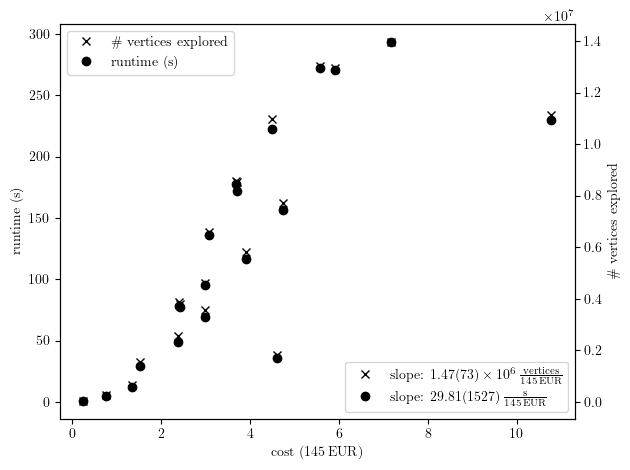

In [33]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'cost $(145\, \mathrm{EUR}) $') #$(\frac{1}{362.5\, \text{km}^2})$')
ax1.set_ylabel(r'runtime (s)')
time = ax1.plot(ssst_df.distance, ssst_df.time, marker='o', linestyle = '',color='black')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel(r'\# vertices explored')#'# vertices explored'
vert =ax2.plot(ssst_df.distance, ssst_df.vert_tchd, marker='x',linestyle = '',color='black')
ax2.tick_params(axis='y')

x = mlines.Line2D([], [], color='black', marker='x', label='\\# vertices explored',linestyle='')
o = mlines.Line2D([], [], color='black', marker='o', label='runtime (s)',linestyle='')
ax1.legend(handles=[x,o])

x_slope = mlines.Line2D([], [], color='black', marker='x', label=r'slope: $1.47(73) \times 10^6 \, \frac{\mathrm{vertices}}{145\, \mathrm{EUR}}$',linestyle='')
o_slope = mlines.Line2D([], [], color='black', marker='o', label=r'slope: $29.81(1527) \, \frac{\mathrm{s}}{145\, \mathrm{EUR}}$',linestyle='')
legend2 = plt.legend(handles=[x_slope,o_slope],loc=4)

fig.tight_layout()
plt.savefig('data/vis/dijkstra_self/SSST_res_20.pdf', format='pdf')
plt.show()

In [40]:
print((ssst_df.time/(ssst_df.vert_tchd*10**(-7))).mean())
print((ssst_df.time/(ssst_df.vert_tchd*10**(-7))).std())

201.8295569069928
7.569690585352961


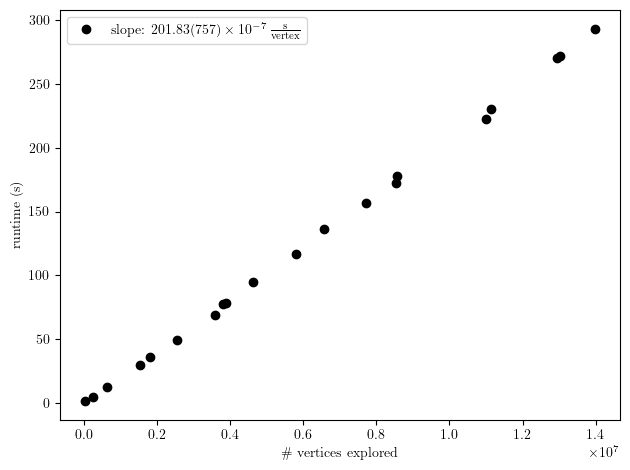

In [41]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'\# vertices explored')
ax1.set_ylabel(r'runtime (s)')
ax1.plot(ssst_df.vert_tchd, ssst_df.time, marker='o', linestyle = '',color='black')
ax1.tick_params(axis='y')
o_slope = mlines.Line2D([], [], color='black', marker='o', label=r'slope: $201.83(757) \times 10^{-7} \, \frac{\mathrm{s}}{\mathrm{vertex}}$',linestyle='')
ax1.legend(handles=[o_slope])
fig.tight_layout()
plt.savefig('data/vis/dijkstra_self/SSST_res_20_vert-t.pdf', format='pdf')
plt.show()

## SSSP 11528260 visualization

### Cost
Visualizing the cost of the path from each vertex to vertex 11528260.

In [11]:
#full SSSP
dist_load=np.load(f'data/bench/dijkstra_self/SSSP_11528260.npy',allow_pickle=True)[:,0]
dist_load[dist_load==np.inf] = np.nan
dist_load

array([nan, nan, nan, ..., nan, nan, nan])

In [46]:
#size in memory
dist_load.nbytes

184416000

In [10]:
#checking if it's the same as scipy
dist_scipy=np.load(f'data/bench/dijkstra/scipy_SSSP_11528260_cost.npy',allow_pickle=True)[0]
dist_scipy[dist_scipy==np.inf] = np.nan
np.array_equal(dist_load, dist_scipy, equal_nan=True)

True

In [11]:
np.nanmax(dist_load)

37.896594566176645

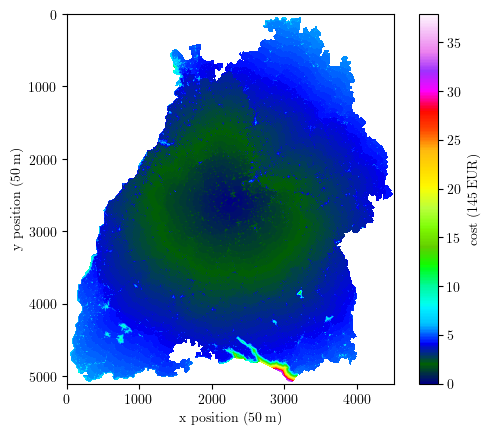

In [12]:
plt.imshow(dist_load.reshape((5100,4520)), cmap='gist_ncar', vmin=0.0, vmax=np.nanmax(dist_load), interpolation='none')
plt.colorbar(label=r'cost $(145\, \mathrm{EUR}) $')
plt.xlabel(r'x position $(50\, \mathrm{m}) $')
plt.ylabel(r'y position $(50\, \mathrm{m}) $')
plt.savefig('data/vis/dijkstra_self/SSSP_11528260.pdf', format='pdf')
plt.show()

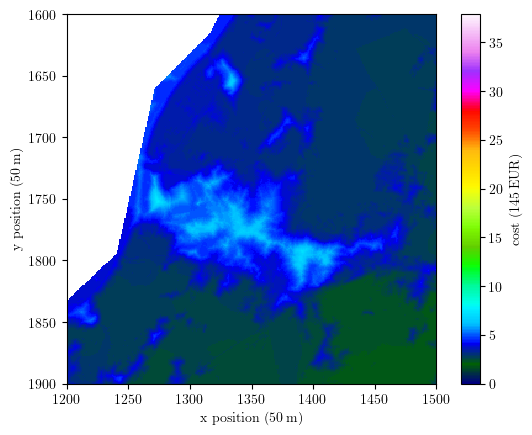

In [13]:
plt.imshow(dist_load.reshape((5100,4520)), cmap='gist_ncar', vmin=0.0, vmax=np.nanmax(dist_load), interpolation='none')
plt.colorbar(label=r'cost $(145\, \mathrm{EUR}) $')
plt.xlim(1200, 1500)
plt.ylim(1900,1600)
plt.xlabel(r'x position $(50\, \mathrm{m}) $')
plt.ylabel(r'y position $(50\, \mathrm{m}) $')
plt.savefig('data/vis/dijkstra_self/SSSP_11528260_KA.pdf', format='pdf')
plt.show()

### Backtracking

Visualizing the predecessor array calculated for 11528260, by coloring the movement that hast to be made on each vertex to reach 11528260 with least-cost.

In [14]:
#predecessor import
predecessors=np.load(f'data/bench/dijkstra_self/SSSP_11528260.npy',allow_pickle=True)[:,2]
predecessors

array([-1., -1., -1., ..., -1., -1., -1.])

In [15]:
#define func to create backtracking matrix
#0=nothing, 1=right, 2=left,3=up,4=down, 5=r-rup, 6=l-up, 7=r-down,8=l-down
def backtr(pred_arr,arr_shape):
    #if not (pred_arr.shape == arr_shape):
    #    pred_arr = pred_arr.reshape(arr_shape)
    pred_arr = pred_arr.reshape(arr_shape)
    backtr_arr=np.zeros(arr_shape)
    ind_list = list(np.ndindex(arr_shape))
    for ind in np.ndindex(arr_shape):
        if not (pred_arr[ind] == -1):
            if (np.subtract(ind, ind_list[pred_arr[ind]]) == np.array([0,-1])).all():
                backtr_arr[ind] = 1
            elif (np.subtract(ind, ind_list[pred_arr[ind]]) == np.array([0,1])).all():
                backtr_arr[ind] = 2
            elif (np.subtract(ind, ind_list[pred_arr[ind]]) == np.array([1,0])).all():
                backtr_arr[ind] = 3
            elif (np.subtract(ind, ind_list[pred_arr[ind]]) == np.array([-1,0])).all():
                backtr_arr[ind] = 4
            elif (np.subtract(ind, ind_list[pred_arr[ind]]) == np.array([1,-1])).all():
                backtr_arr[ind] = 5
            elif (np.subtract(ind, ind_list[pred_arr[ind]]) == np.array([1,1])).all():
                backtr_arr[ind] = 6
            elif (np.subtract(ind, ind_list[pred_arr[ind]]) == np.array([-1,-1])).all():
                backtr_arr[ind] = 7
            elif (np.subtract(ind, ind_list[pred_arr[ind]]) == np.array([-1,1])).all():
                backtr_arr[ind] = 8
    return backtr_arr

In [16]:
backtr_arr= backtr(predecessors.astype(int),(5100,4520))
backtr_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

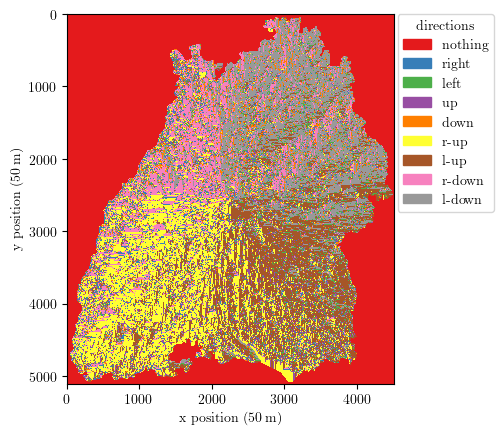

In [17]:
#https://stackoverflow.com/a/40666180
im = plt.imshow(backtr_arr,cmap='Set1', interpolation='none')
values = np.unique(backtr_arr)
direction = ['nothing', 'right', 'left','up','down', 'r-up', 'l-up', 'r-down','l-down']
# get the colors of the values, according to the 
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label=direction[i] ) for i in range(len(direction)) ]
# put those patches as legend-handles into the legend
plt.legend(handles=patches, title='directions', bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0. )
plt.xlabel(r'x position $(50\, \mathrm{m}) $')
plt.ylabel(r'y position $(50\, \mathrm{m}) $')
plt.savefig('data/vis/dijkstra_self/SSSP_11528260_backtr.pdf',format='pdf')
plt.show()

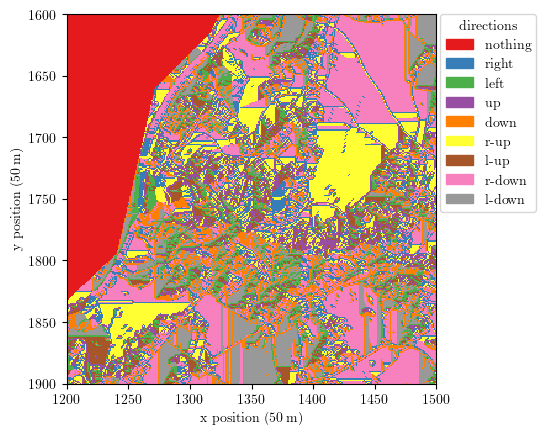

In [18]:
#https://stackoverflow.com/a/40666180
im = plt.imshow(backtr_arr,cmap='Set1', interpolation='none')
values = np.unique(backtr_arr)
direction = ['nothing', 'right', 'left','up','down', 'r-up', 'l-up', 'r-down','l-down']
# get the colors of the values, according to the 
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label=direction[i] ) for i in range(len(direction)) ]
# put those patches as legend-handles into the legend
plt.legend(handles=patches, title='directions', bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0. )
plt.xlim(1200, 1500)
plt.ylim(1900,1600)
plt.xlabel(r'x position $(50\, \mathrm{m}) $')
plt.ylabel(r'y position $(50\, \mathrm{m}) $')
plt.savefig('data/vis/dijkstra_self/SSSP_11528260_backtr_KA.pdf',format='pdf')
plt.show()

## SSST 11528260_9708000 explored visualization

Visualizing the vertices that were explored by Dijkstra to the find the least-cost path between 11528260 and 970800.

In [16]:
dist = visited=np.load(f'data/bench/dijkstra_self/11528260_9708000.npy',allow_pickle=True)[:,0]
print(dist[11528260])
print(dist[9708000])

0.0
3.015566669171676


In [19]:
visited=np.load(f'data/bench/dijkstra_self/11528260_9708000.npy',allow_pickle=True)[:,1]
#visited = visited.astype(int)
visited

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
visited.sum()

6485583

In [5]:
predecessors=np.load(f'data/bench/dijkstra_self/11528260_9708000.npy',allow_pickle=True)[:,2]
predecessors = predecessors.astype(int)
predecessors

array([-1, -1, -1, ..., -1, -1, -1])

In [6]:
path=np.zeros(5100*4520)
ind = 9708000
path[ind] = 1
while not (ind == 11528260):
    path[predecessors[ind]] = 1
    ind=predecessors[ind]
path[path==0] = np.nan
path

array([nan, nan, nan, ..., nan, nan, nan])

In [7]:
path_c = np.zeros(5100*4520)
path_c[path==1] = 1
y,x = np.nonzero(path_c.reshape((5100,4520)))
perm = x.argsort()
x_sort = x[perm]
y_sort = y[perm]

In [13]:
path_c.sum()

1374.0

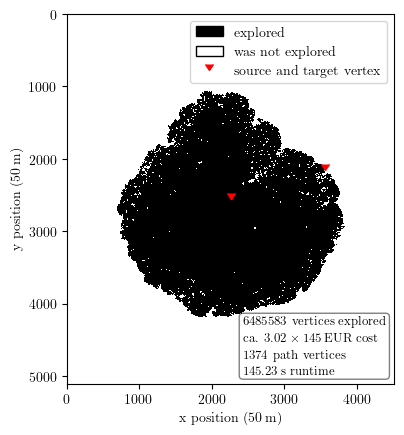

In [20]:
plt.imshow(visited.reshape((5100,4520)), cmap='binary', vmin=0, vmax=1, interpolation='none')
#plt.imshow(path.reshape((5100,4520)), cmap='OrRd', vmin=0, vmax=1, interpolation='none')
#plt.plot(x_sort,y_sort)
#plt.colorbar(label=r'distance $(145\, \mathrm{EUR}) $')
plt.plot(2260,2550, color='red',marker=7,linestyle='')
plt.plot(3560,2147, color='red',marker=7,linestyle='')
patches = [mpatches.Patch(color='black', label='explored'),mpatches.Patch(facecolor='white', label='was not explored',edgecolor='black'),mlines.Line2D([], [], color='red', marker=7, label=r'source and target vertex',linestyle='')]
plt.legend(handles=patches, loc=1)
plt.xlabel(r'x position $(50\, \mathrm{m}) $')
plt.ylabel(r'y position $(50\, \mathrm{m}) $')

text=  (r'\noindent 6485583 vertices explored $\newline$'
        r'ca. $3.02 \times 145\, \mathrm{EUR}$ cost \newline'
        r'1374 path vertices \newline'
        r'$145.23 \, \mathrm{s}$ runtime\newline')

plt.text(4400,4300 , text, fontsize=9, bbox=dict(boxstyle='round', fc='white', ec='black',alpha=0.5),  horizontalalignment='right')

plt.savefig('data/vis/dijkstra_self/11528260_9708000_vis.pdf', format='pdf')
plt.show()

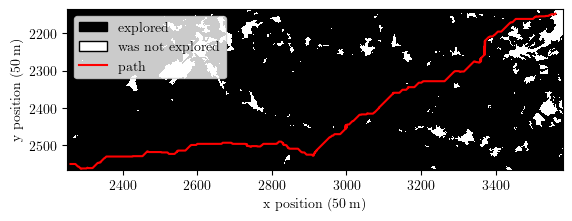

In [9]:
plt.imshow(visited.reshape((5100,4520)), cmap='binary', vmin=0, vmax=1, interpolation='none')
#plt.imshow(path.reshape((5100,4520)), cmap='OrRd', vmin=0, vmax=1, interpolation='none')
#plt.colorbar(label=r'distance $(145\, \mathrm{EUR}) $')
plt.plot(x_sort,y_sort, color ='red',linestyle='solid')
#plt.plot(2260,2550, color='red',marker='x',linestyle='')
#plt.plot(3560,2147, color='red',marker='x',linestyle='')
patches = [mpatches.Patch(color='black', label='explored'),mpatches.Patch(facecolor='white', label='was not explored',edgecolor='black'),mlines.Line2D([], [], color='red', marker='', label=r'path',linestyle='solid')]
plt.legend(handles=patches, loc=2)
plt.xlabel(r'x position $(50\, \mathrm{m}) $')
plt.ylabel(r'y position $(50\, \mathrm{m}) $')
plt.xlim(2250, 3580)
plt.ylim(2565,2135)
plt.savefig('data/vis/dijkstra_self/11528260_9708000_vis_zoom.pdf', format='pdf')
plt.show()

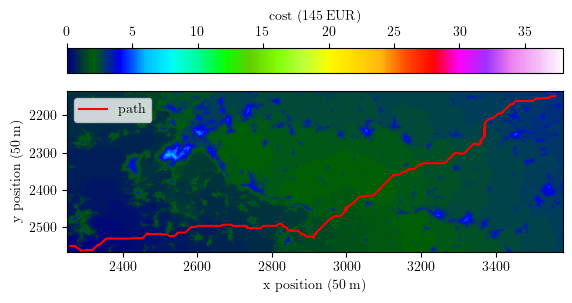

In [12]:
plt.imshow(dist_load.reshape((5100,4520)), cmap='gist_ncar', vmin=0.0, vmax=np.nanmax(dist_load), interpolation='none')
plt.colorbar(label=r'cost $(145\, \mathrm{EUR}) $',location='top')
plt.plot(x_sort,y_sort, color ='red',linestyle='solid')
patches = [mlines.Line2D([], [], color='red', marker='', label=r'path',linestyle='solid')]
plt.legend(handles=patches, loc=2)
plt.xlim(2250, 3580)
plt.ylim(2565,2135)
plt.xlabel(r'x position $(50\, \mathrm{m}) $')
plt.ylabel(r'y position $(50\, \mathrm{m}) $')
plt.savefig('data/vis/dijkstra_self/11528260_9708000_vis_zoom_SSSP.pdf', format='pdf')
plt.show()

In [25]:
def ind_to_coord(node_ind, shape):
    return int(node_ind/shape[1]), int(node_ind % shape[1])

In [26]:
ind_to_coord(9708000,(5100,4520))

(2147, 3560)

In [27]:
ind_to_coord(11528260,(5100,4520))

(2550, 2260)